In [18]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import numpy as np

In [2]:
hour = np.array([1,2,3,3,4,4,5,5,5,6,6,6,6,7])
min = np.array([57,48,11,34,10,40,18,43,57,13,30,42,58,12])
time = hour + min/60

0.766217991574929

0.15668436364745336

Text(0.5, 1.0, 'Glycerol Yield')

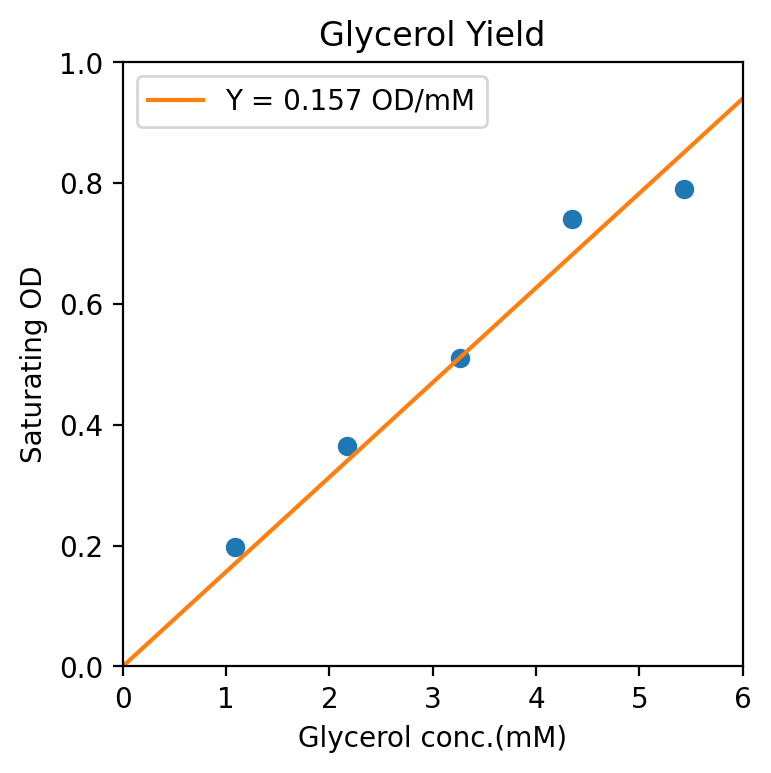

In [33]:
odar = np.zeros((len(time), 5))
types = ['o', 's', 'v', '<', 'p']
glycerol_wv = np.array([0.01, 0.02, 0.03, 0.04, 0.05])
glycerol_mM = glycerol_wv*10/92*1e3
odar[:,0] = np.array([20,44,58,78,125,193,201,198,197, np.nan,np.nan,np.nan,np.nan,197])
odar[:,1] = np.array([20,43,58,76,120,185,292,365,365,np.nan,np.nan,np.nan,np.nan,365])
odar[:,2] = np.array([20,43,56,76,119,182,281,384,460,507,510,np.nan,np.nan,510])
odar[:,3] = np.array([20,45,58,78,122,186,291,402,477,571,700,724,740,740])
odar[:,4] = np.array([20,41,53,72,112,173,270,371,442,530,646,740,800,790])

odar /= 1000
p = np.polyfit(time[1:5], np.log(odar[1:5,0]), 1)
grmax = p[0]

x = glycerol_mM
y = odar[-1,:]
# far = np.array([True, True, True, False, True])
p = curve_fit(lambda a,x: a*x, x, y)[0]
Y = p[0]
# Y = 0.16
display(grmax)
display(Y)

xx = np.arange(0,10)
yy = Y*xx
fig,ax = plt.subplots(figsize=(4,4), dpi=200)

ax.plot(x,y,'o')
ax.plot(xx,yy, label=f'Y = {round(Y*1000)/1000} OD/mM')
ax.set_xlim(0,6)
ax.set_ylim(0,1)
ax.set_xlabel("Glycerol conc.(mM)")
ax.set_ylabel("Saturating OD")
ax.legend()
ax.set_title("Glycerol Yield")

In [25]:
Km = 0.1 # mM

def calc_model(glycerol_mM, grmax, Y, Km):
    dt = 0.001
    tar = np.arange(0,10, dt)
    rhoar = np.zeros((len(tar),len(glycerol_mM)))
    # fig,ax = plt.subplots(figsize=(4,4), dpi=400)
    for gix in range(len(glycerol_mM)):
        gly = glycerol_mM[gix]
#         rhoar = np.zeros_like(tar)
        nar = np.zeros_like(tar)

        # Initial conditions
        nar[0] = gly
        rhoar[0, gix] = 0.02

        # Growth calculation
        def calc_gr(grmax, n, Km):
            return grmax*n/(n+Km)

        for tix in range(len(tar)-1):
            gr = calc_gr(grmax, nar[tix], Km)
            rhoar[tix+1, gix] = rhoar[tix, gix] + dt*gr*rhoar[tix, gix]
            nar[tix+1] = nar[tix] - dt*gr*rhoar[tix, gix]/Y
            if nar[tix+1] < 0:
                nar[tix+1] = 0
    return tar, rhoar

Text(0, 0.5, 'OD600')

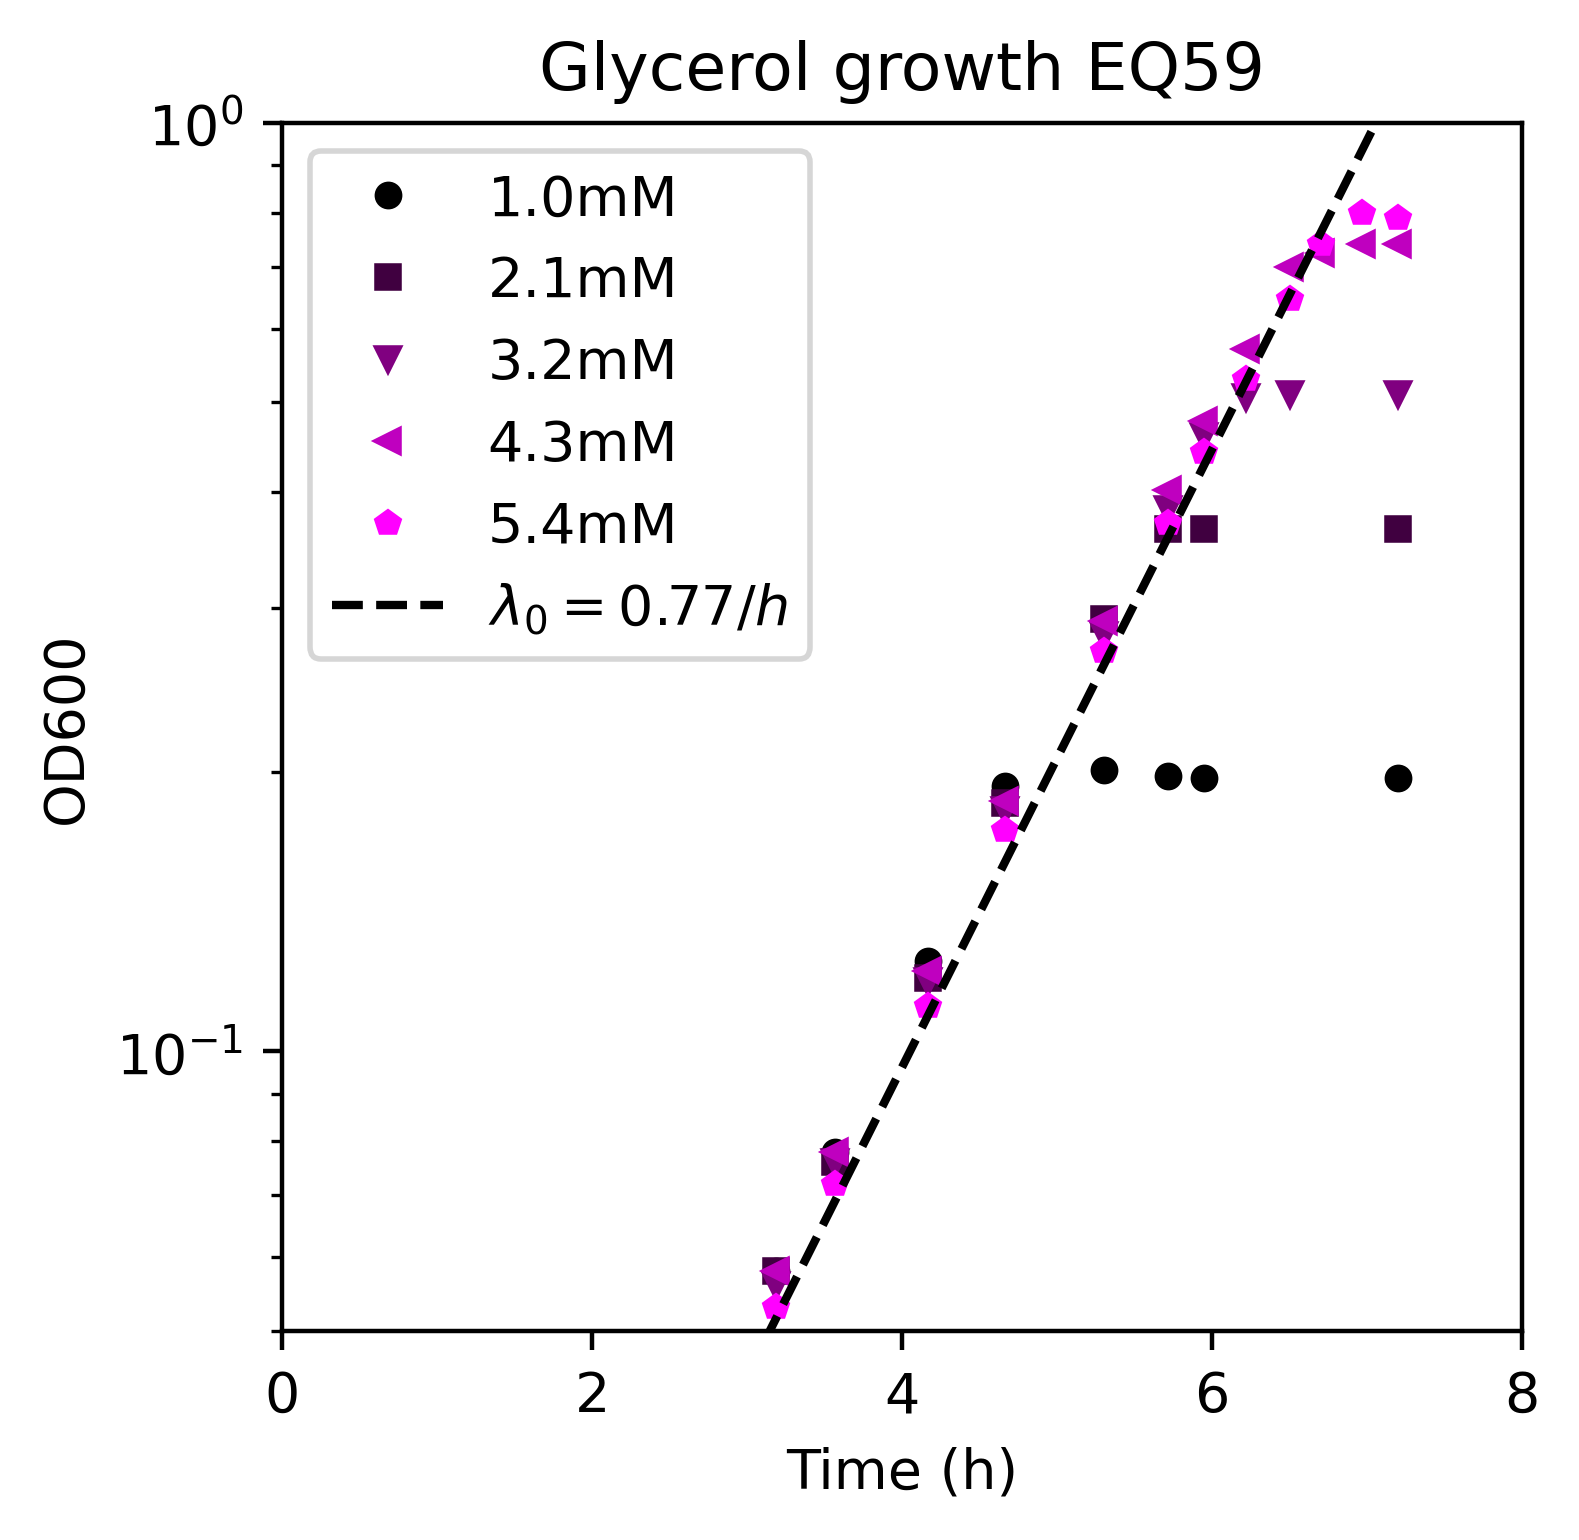

In [44]:
Km = 0.1 # mM
tar, rhoar = calc_model(glycerol_mM, grmax, Y, Km)
rhoar_grmax = rhoar[0,0]*np.exp(grmax*tar)
tar += time[0]
# fig,axar = plt.subplots(3,2, figsize=(4,4), dpi=400)
fig,ax = plt.subplots(figsize=(4,4), dpi=400)
# axes = axar.flatten()
for gix in range(len(glycerol_wv)):
#     ax = axes[gix]
    gly = int(glycerol_mM[gix]*10)/10
    ax.semilogy(time, odar[:,gix], types[gix], color = (gix/4, 0, gix/4), markersize=4, label=f"{gly}mM")
#     ax.semilogy(tar, rhoar[:,gix], '-', color=(gix/4, 0, gix/4))
    ax.set_xlim(0,8)
    ax.set_ylim(0.05,1)
    ax.yaxis.set_major_locator(plt.FixedLocator([0.01,0.02,0.04,0.08,0.16,0.32,0.64]))
    ax.yaxis.set_major_formatter(plt.FixedFormatter(["0.01", "" , "0.04", "0.08", "0.16", "0.32", "0.64"]))
    ax.yaxis.set_minor_locator(plt.NullLocator())
    
# ax.set_title(r"$K_M = %d\mu M$" % (Km*1e3))
ax.semilogy(tar, rhoar_grmax, 'k--', label=r"$\lambda_0 = %.2f/h$" % (grmax))
ax.set_title("Glycerol growth EQ59")
ax.legend()
ax.set_xlabel("Time (h)")
ax.set_ylabel("OD600")

In [38]:
rhoar[0]

array([0.02, 0.02, 0.02, 0.02, 0.02])

## Calculate the growth curve for a given uptake rate and Km
$$\frac{d\rho}{dt} = \lambda_0 \frac{n}{n+K_M}\rho, \frac{dn}{dt} = -\frac{\lambda_0}{Y}\frac{n}{n+K_M}\rho$$

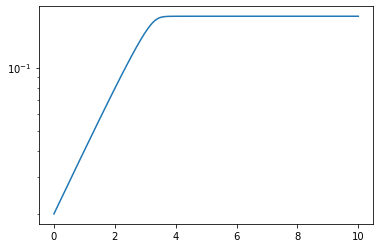

In [112]:
plt.semilogy(tar, rhoar,'-')

In [95]:
glycerol_mM

array([0.01086957, 0.02173913, 0.0326087 , 0.04347826, 0.05434783])

In [98]:
0.2*10/208*1e3

9.615384615384617